# Unsupervised Analysis of Days of Week

Treating crossings each day as features to learn about the relationships between various days

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from jupyterworkflow.data import get_fremont_data
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture

## Get Data

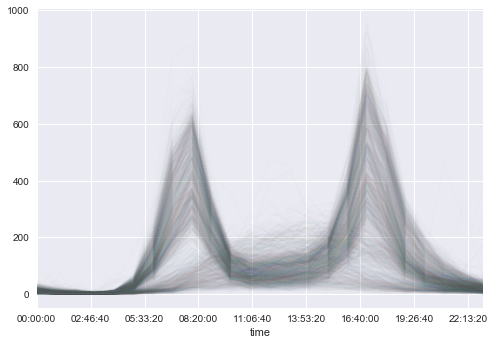

In [2]:
data = get_fremont_data()
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.plot(legend=False, alpha=0.01)

In [3]:
pivoted.index[:24]

Index([00:00:00, 01:00:00, 02:00:00, 03:00:00, 04:00:00, 05:00:00, 06:00:00,
       07:00:00, 08:00:00, 09:00:00, 10:00:00, 11:00:00, 12:00:00, 13:00:00,
       14:00:00, 15:00:00, 16:00:00, 17:00:00, 18:00:00, 19:00:00, 20:00:00,
       21:00:00, 22:00:00, 23:00:00],
      dtype='object')

In [4]:
data.index

DatetimeIndex(['2012-10-03 00:00:00', '2012-10-03 01:00:00',
               '2012-10-03 02:00:00', '2012-10-03 03:00:00',
               '2012-10-03 04:00:00', '2012-10-03 05:00:00',
               '2012-10-03 06:00:00', '2012-10-03 07:00:00',
               '2012-10-03 08:00:00', '2012-10-03 09:00:00',
               ...
               '2017-02-28 14:00:00', '2017-02-28 15:00:00',
               '2017-02-28 16:00:00', '2017-02-28 17:00:00',
               '2017-02-28 18:00:00', '2017-02-28 19:00:00',
               '2017-02-28 20:00:00', '2017-02-28 21:00:00',
               '2017-02-28 22:00:00', '2017-02-28 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=38640, freq=None)

In [5]:

np.unique(data.index.time)

array([datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0),
       datetime.time(3, 0), datetime.time(4, 0), datetime.time(5, 0),
       datetime.time(6, 0), datetime.time(7, 0), datetime.time(8, 0),
       datetime.time(9, 0), datetime.time(10, 0), datetime.time(11, 0),
       datetime.time(12, 0), datetime.time(13, 0), datetime.time(14, 0),
       datetime.time(15, 0), datetime.time(16, 0), datetime.time(17, 0),
       datetime.time(18, 0), datetime.time(19, 0), datetime.time(20, 0),
       datetime.time(21, 0), datetime.time(22, 0), datetime.time(23, 0)], dtype=object)

In [6]:
!head fremont.csv

Date,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
10/03/2012 12:00:00 AM,4,9
10/03/2012 01:00:00 AM,4,6
10/03/2012 02:00:00 AM,1,1
10/03/2012 03:00:00 AM,2,3
10/03/2012 04:00:00 AM,6,1
10/03/2012 05:00:00 AM,21,10
10/03/2012 06:00:00 AM,105,50
10/03/2012 07:00:00 AM,257,95
10/03/2012 08:00:00 AM,291,146


In [7]:
pivoted.shape

(24, 1610)

In [8]:
X = pivoted.T.fillna(0).values
X.shape

(1610, 24)

In [9]:
from sklearn.decomposition import PCA
X2 = PCA(2, svd_solver='full').fit_transform(X)

In [10]:
X2.shape

(1610, 2)

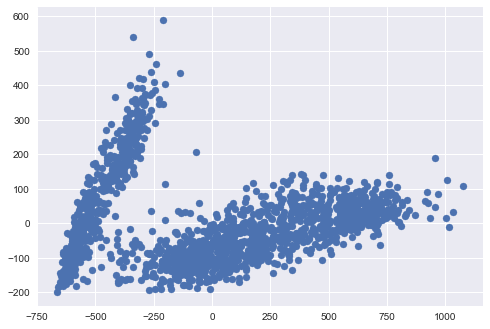

In [11]:
import matplotlib.pyplot as plt
plt.scatter(X2[:, 0], X2[:, 1])

In [12]:

gmm = GaussianMixture(2).fit(X)
labels = gmm.predict(X)
labels

array([1, 1, 1, ..., 0, 1, 1])

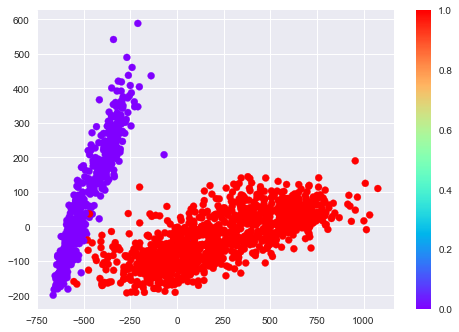

In [13]:
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap='rainbow')
plt.colorbar()

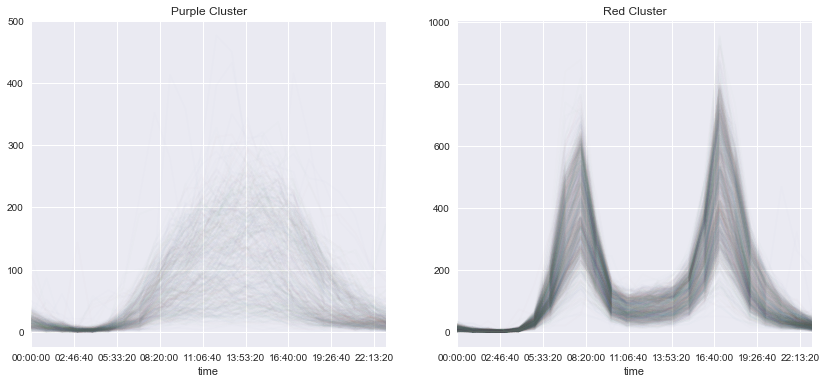

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
pivoted.T[labels == 0].T.plot(legend=False, alpha=0.01, ax=ax[0])
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.01, ax=ax[1])
ax[0].set_title('Purple Cluster')
ax[1].set_title('Red Cluster')

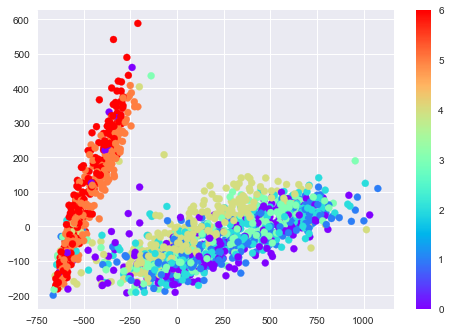

In [15]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek
plt.scatter(X2[:, 0], X2[:, 1], c=dayofweek, cmap='rainbow')
plt.colorbar()

## Analyzing Outliers

The following days are weekdays (mostly holidays) with a weekend-like pattern

In [16]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek < 5)]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2017-02-15', '2017-02-16', '2017-02-17', '2017-02-20',
               '2017-02-21', '2017-02-22', '2017-02-23', '2017-02-24',
               '2017-02-27', '2017-02-28'],
              dtype='datetime64[ns]', length=1109, freq=None)